In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

# Linear Regression

In [10]:
#observations for the top 20
laliga_df=pd.read_csv("/kaggle/input/laliga-player-stats/playerstats.csv",delimiter=",")
minutes_model=laliga_df[["Player","Squad","Min","Age"]]
minutes_model['Age_squared'] = np.power(minutes_model["Age"],2)
minutes_model['Age_cubed'] = np.power(minutes_model["Age"],3)
minutes_model

/tmp/ipykernel_35/379494396.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minutes_model['Age_squared'] = np.power(minutes_model["Age"],2)
/tmp/ipykernel_35/379494396.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minutes_model['Age_cubed'] = np.power(minutes_model["Age"],3)


,Player,Squad,Min,Age,Age_squared,Age_cubed
0,Luis Abram,Granada,560,25.0,625.0,15625.0
1,Marcos Acuña,Sevilla,2260,29.0,841.0,24389.0
2,Martin Agirregabiria,Alavés,1616,25.0,625.0,15625.0
3,Julen Agirrezabala,Athletic Club,360,20.0,400.0,8000.0
4,Sergio Agüero,Barcelona,151,33.0,1089.0,35937.0
...,...,...,...,...,...,...
612,Joseba Zaldúa,Real Sociedad,1172,29.0,841.0,24389.0
613,Oier Zarraga,Athletic Club,1166,22.0,484.0,10648.0
614,Luca Zidane,Rayo Vallecano,645,23.0,529.0,12167.0
615,Igor Zubeldia,Real Sociedad,1648,24.0,576.0,13824.0


## Plotting the data

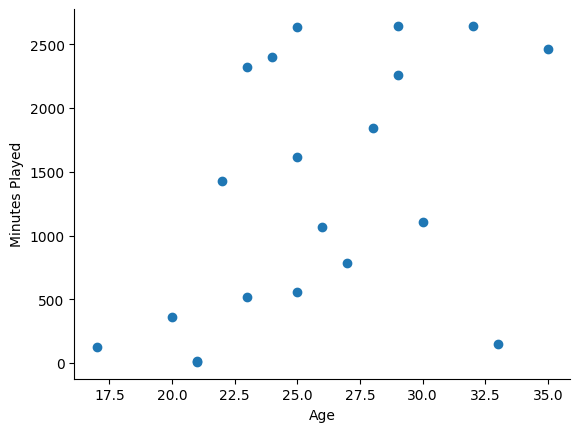

In [17]:
fig, ax = plt.subplots(num=1)
plt.scatter(x="Age",y="Min",data=minutes_model.head(20))
ax.set_xlabel("Age")
ax.set_ylabel("Minutes Played")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

## Fitting the line

In [27]:
model_fit = smf.ols(formula='Min ~ Age  ', data=minutes_model.head(20)).fit()
print(model_fit.summary())
b=model_fit.params

                            OLS Regression Results                            
Dep. Variable:                    Min   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     5.415
Date:                Thu, 12 Jun 2025   Prob (F-statistic):             0.0318
Time:                        19:43:58   Log-Likelihood:                -163.24
No. Observations:                  20   AIC:                             330.5
Df Residuals:                      18   BIC:                             332.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1293.0147   1152.158     -1.122      0.2

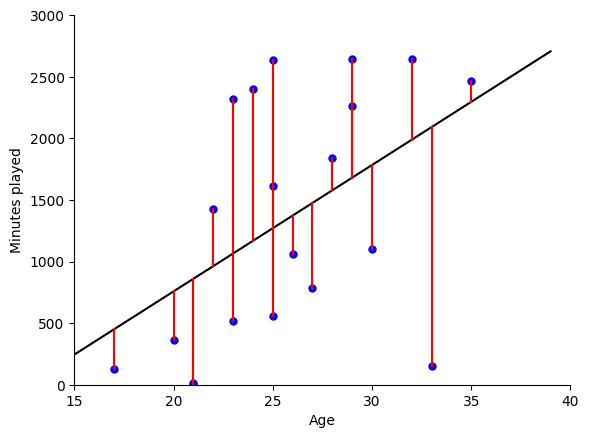

In [35]:
#First plot the data as previously
fig,ax=plt.subplots(num=1)
ax.plot('Age','Min',data=minutes_model.head(20), linestyle='none', marker= '.', markersize= 10, color='blue')
ax.set_ylabel('Minutes played')
ax.set_xlabel('Age')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlim((15,40))
plt.ylim((0,3000))

#Now create the line through the data
x=np.arange(40,step=1)
y= b[0]+b[1]*x
ax.plot(x, y, color='black')

#Show distances to line for each point
for i,a in enumerate(minutes_model['Age'].head(20)):
    ax.plot([a,a],[minutes_model['Min'].head(20)[i], b[0]+b[1]*a], color='red')
plt.show()

## Including the squared terms

                            OLS Regression Results                            
Dep. Variable:                    Min   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     3.559
Date:                Thu, 12 Jun 2025   Prob (F-statistic):             0.0512
Time:                        20:00:05   Log-Likelihood:                -162.38
No. Observations:                  20   AIC:                             330.8
Df Residuals:                      17   BIC:                             333.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -8063.5823   5573.188     -1.447      

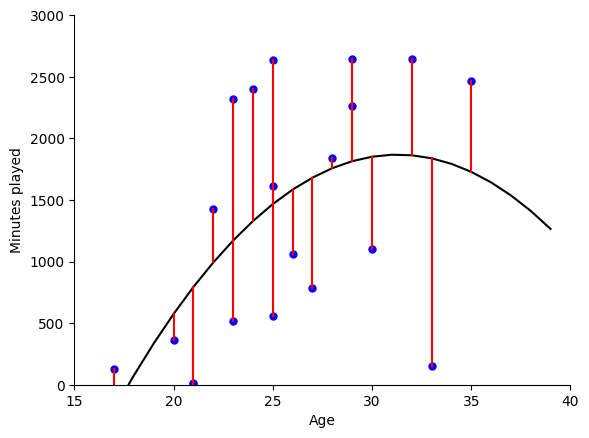

In [38]:
model_fit = smf.ols(formula='Min ~ Age + Age_squared  ', data=minutes_model.head(20)).fit()
print(model_fit.summary())
b=model_fit.params


#First plot the data as previously
fig,ax=plt.subplots(num=1)
ax.plot('Age','Min',data=minutes_model.head(20), linestyle='none', marker= '.', markersize= 10, color='blue')
ax.set_ylabel('Minutes played')
ax.set_xlabel('Age')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlim((15,40))
plt.ylim((0,3000))

#Now create the line through the data
x=np.arange(40,step=1)
y= b[0]+b[1]*x+b[2]*x*x
ax.plot(x, y, color='black')

#Show distances to line for each point
for i,a in enumerate(minutes_model['Age'].head(20)):
    ax.plot([a,a],[minutes_model['Min'].head(20)[i], b[0]+b[1]*a+b[2]*a*a], color='red')
plt.show()

### Now try with all data points
1. Refit the model with all data points
2. Try adding a cubic term
3. Think about how well the model works. What are the limitations?

                            OLS Regression Results                            
Dep. Variable:                    Min   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     34.82
Date:                Thu, 12 Jun 2025   Prob (F-statistic):           8.73e-21
Time:                        20:01:18   Log-Likelihood:                -5056.6
No. Observations:                 616   AIC:                         1.012e+04
Df Residuals:                     612   BIC:                         1.014e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.024e+04   4002.240     -2.559      

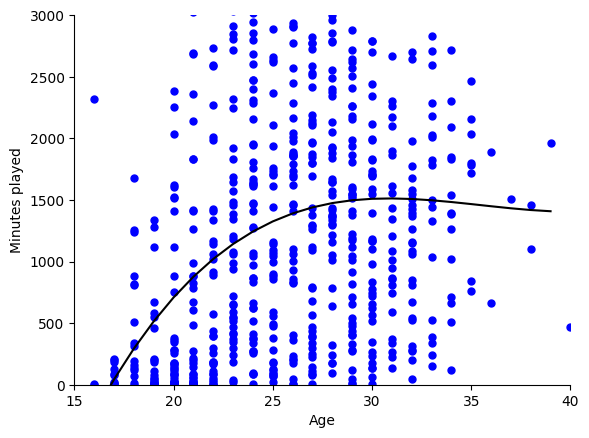

In [40]:
model_fit = smf.ols(formula='Min ~ Age + Age_squared + Age_cubed  ', data=minutes_model).fit()
print(model_fit.summary())
b=model_fit.params


#First plot the data as previously
fig,ax=plt.subplots(num=1)
ax.plot('Age','Min',data=minutes_model, linestyle='none', marker= '.', markersize= 10, color='blue')
ax.set_ylabel('Minutes played')
ax.set_xlabel('Age')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlim((15,40))
plt.ylim((0,3000))

#Now create the line through the data
x=np.arange(40,step=1)
y= b[0]+b[1]*x+b[2]*x*x+b[3]*x*x*x
ax.plot(x, y, color='black')

#Show distances to line for each point
#for i,a in enumerate(minutes_model['Age'].head(20)):
 #   ax.plot([a,a],[minutes_model['Min'].head(20)[i], b[0]+b[1]*a+b[2]*a*a], color='red')
plt.show()